Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression


#### Reading weekly data spreadsheet

In [2]:
cases = pd.read_csv('data/df_semanal_20142024.csv', index_col=0)
cases

,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
2014-01-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-19,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2014-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-10,108.0,125.0,72.0,105.0,23.0,20.0,31.0,172.0,118.0,28.0,...,5.0,123.0,53.0,174.0,10.0,1.0,44.0,0.0,4.0,14.0
2024-03-17,112.0,115.0,103.0,98.0,35.0,33.0,58.0,201.0,161.0,34.0,...,6.0,150.0,89.0,266.0,22.0,1.0,37.0,2.0,2.0,14.0
2024-03-24,49.0,52.0,46.0,37.0,12.0,11.0,27.0,124.0,73.0,22.0,...,7.0,71.0,53.0,148.0,15.0,4.0,26.0,3.0,4.0,6.0
2024-03-31,43.0,26.0,30.0,30.0,9.0,14.0,29.0,88.0,50.0,14.0,...,0.0,99.0,39.0,123.0,5.0,0.0,29.0,2.0,2.0,5.0


#### Generating overall city histogram

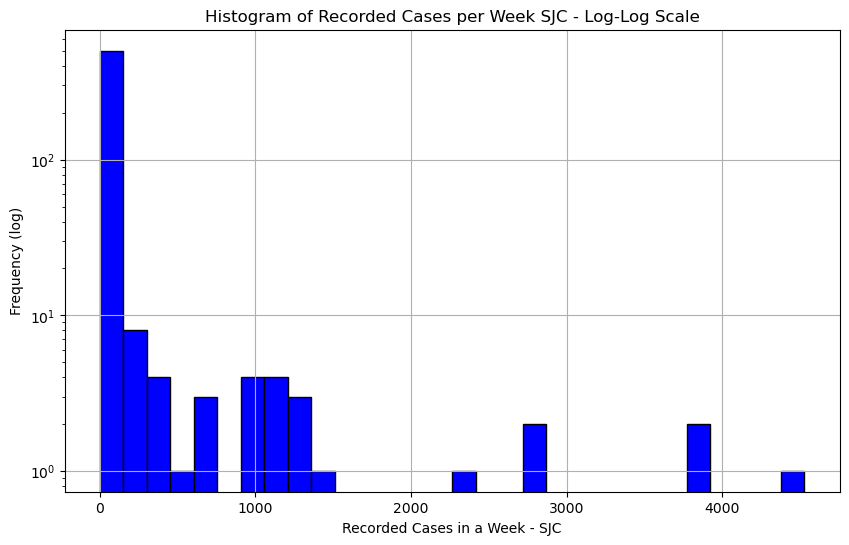

In [3]:
cases_filtered_by_date = cases
# Step 1: Sum the Values of All Columns for Each Day
soma_diaria = cases_filtered_by_date.sum(axis=1)

# Step 2: Plot the Histogram of Daily Sum with Log-Log Scale
plt.figure(figsize=(10, 6))
plt.hist(soma_diaria, bins=30, edgecolor='black', color='blue')

# OGet the Axes Object to Manipulate the Axes
ax = plt.gca()

ax.set_yscale('log')

plt.title('Histogram of Recorded Cases per Week SJC - Log-Log Scale')
plt.xlabel('Recorded Cases in a Week - SJC')
plt.ylabel('Frequency (log)')
plt.grid(True)
plt.show()

#### Histograms by ZT (Traffic Zones)

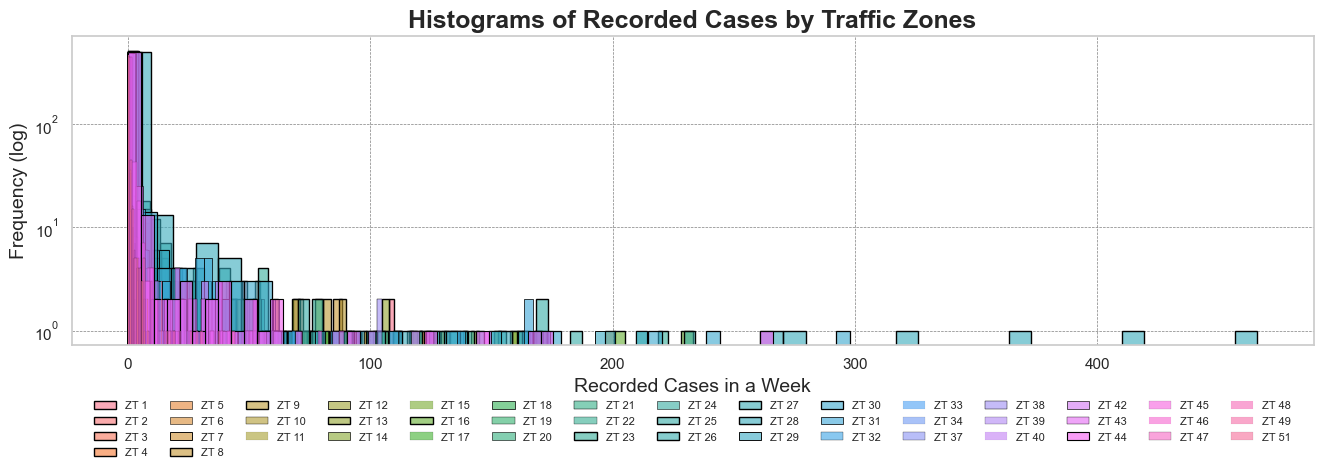

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))  # Aumente a largura do gráfico

num_columns = len(cases_filtered_by_date.columns)
if num_columns <= 20:
    colors = sns.color_palette("tab20", n_colors=num_columns)  # Usa a paleta tab20
else:
    colors = sns.color_palette("husl", n_colors=num_columns)  # Usa uma paleta que gera mais cores

for i, column in enumerate(cases_filtered_by_date.columns):
    sns.histplot(cases_filtered_by_date[column], bins=50, color=colors[i], label=f'ZT {column}', kde=False, alpha=0.6, edgecolor='black')

plt.title('Histograms of Recorded Cases by Traffic Zones', fontsize=18, weight='bold')
plt.xlabel('Recorded Cases in a Week', fontsize=14)
plt.ylabel('Frequency (log)', fontsize=14)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=15, fontsize=8, frameon=False)  # Ajuste ncol para o número de colunas desejado
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax = plt.gca()

ax.set_yscale('log')

plt.tight_layout()  
plt.show()


#### Checking ZTs with Few Recorded Values (Less than 4)

In [5]:
df = cases_filtered_by_date

# Step 1: Count How Many Days (Non-Zero Values) Each Column Had Recorded Cases
days_with_cases = df.apply(lambda col: (col != 0).sum())

# Step 2: Filter Columns with 4 or Fewer Days of Recorded Cases
columns_with_few_cases = days_with_cases[days_with_cases <= 4]

# Result: Display Columns with Up to 4 Days of Recorded Cases
limited_case_columns = columns_with_few_cases.index.tolist()
limited_case_counts = columns_with_few_cases.values

# Create a DataFrame to Display the Columns and the Day Count
result_df = pd.DataFrame({'Coluna': limited_case_columns, 'Dias com Casos Registrados': limited_case_counts})

print(result_df)

Empty DataFrame
Columns: [Coluna, Dias com Casos Registrados]
Index: []


#### Plotting the Number of Zeros per Day

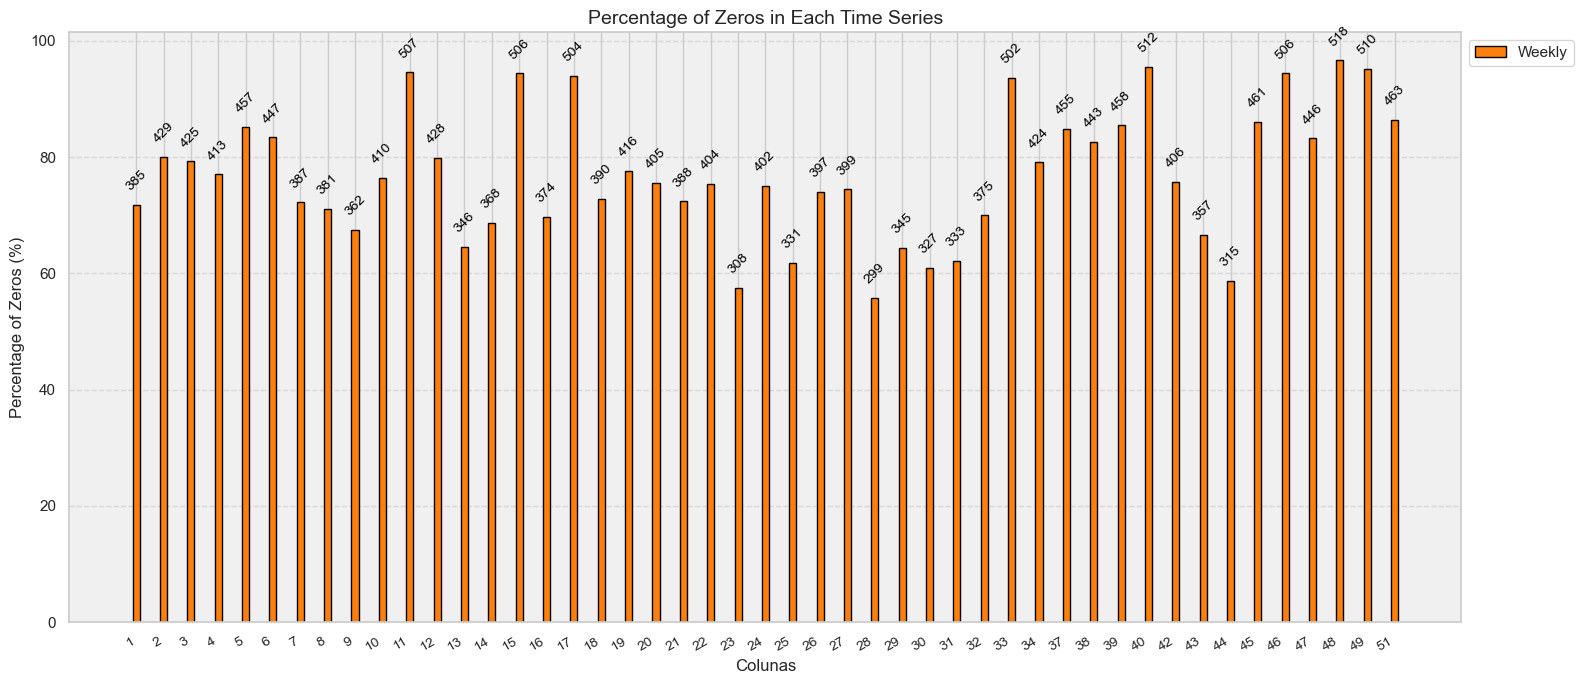

In [6]:
# Function to Calculate Zeros and Percentage
def calculate_zeros_and_percentage(df):
    zeros_count = (df == 0).sum()
    total_count = len(df)  # Total de linhas no DataFrame
    percentage_zeros = (zeros_count / total_count) * 100
    return zeros_count, percentage_zeros

# Calculate for both DataFrames independently
# zeros_count_df1, percentage_zeros_df1 = calculate_zeros_and_percentage(cases_filtered_by_date)
zeros_count_df2, percentage_zeros_df2 = calculate_zeros_and_percentage(cases)

# Define the Bar Width and Spacing
bar_width = 0.35 
spacing = 1  
index = np.arange(len(zeros_count_df2)) * (bar_width + spacing) # Adjust the Position of the Bars

fig, ax = plt.subplots(figsize=(16, 7))

# bars1 = ax.bar(index, percentage_zeros_df1, bar_width, label='Diário', color='#2ca02c', edgecolor='black')

bars2 = ax.bar(index + bar_width, percentage_zeros_df2, bar_width, label='Weekly', color='#ff7f0e', edgecolor='black')

# for i, bar in enumerate(bars1):
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
#             str(int(zeros_count_df1.iloc[i])), 
#             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
            str(int(zeros_count_df2.iloc[i])), 
            ha='center', va='bottom', fontsize=10, color='black', rotation=45)

ax.set_title('Percentage of Zeros in Each Time Series', fontsize=14)
ax.set_xlabel('Colunas', fontsize=12)
ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
ax.set_xticks(index + bar_width)  # Ajustar as posições dos rótulos no eixo x
ax.set_xticklabels(zeros_count_df2.index, rotation=30, ha='right', fontsize=10)  # Inclinar rótulos para 30 graus
ax.legend(fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Grade horizontal

ax.set_facecolor('#f0f0f0')  # Fundo claro para destacar as barras

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


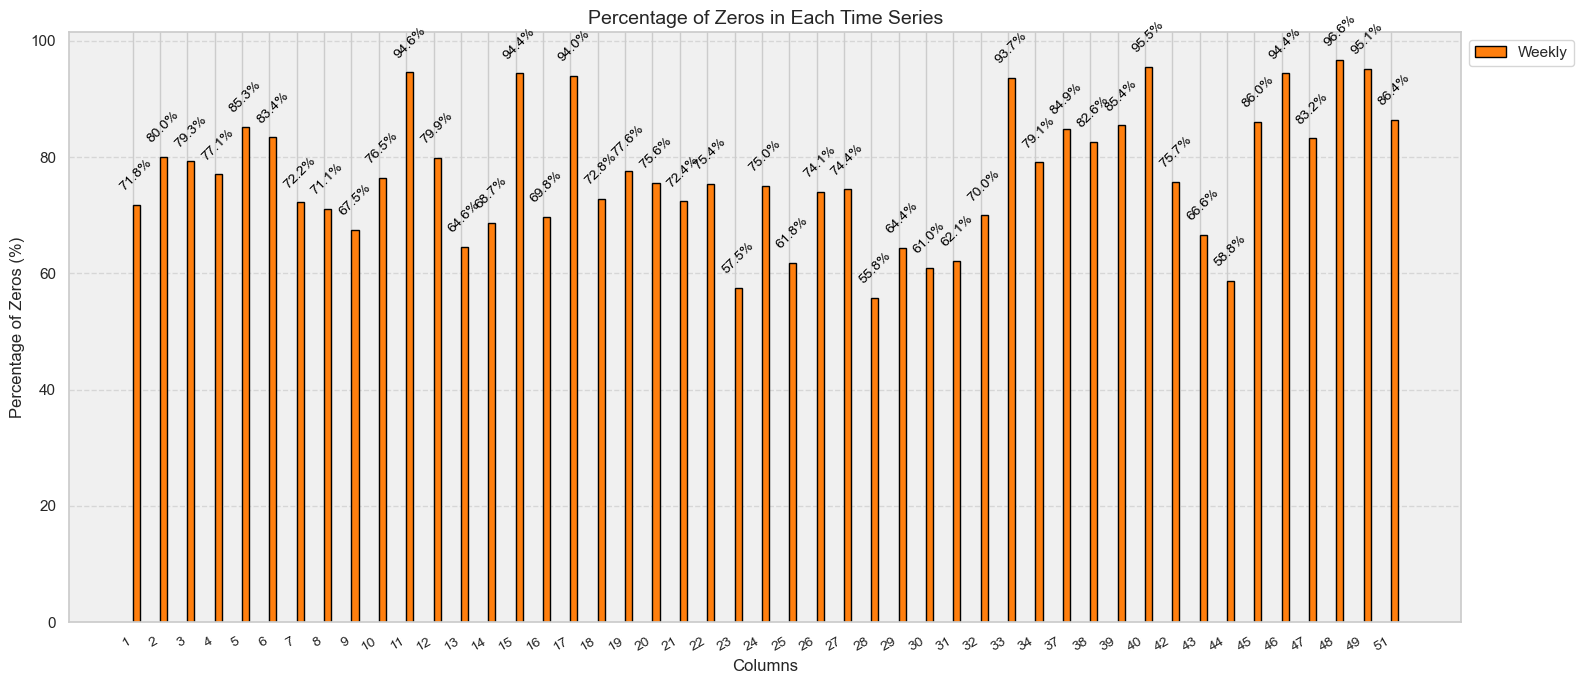

In [7]:
def calculate_zeros_and_percentage(df):
    zeros_count = (df == 0).sum()
    total_count = len(df) 
    percentage_zeros = (zeros_count / total_count) * 100
    return zeros_count, percentage_zeros

# zeros_count_df1, percentage_zeros_df1 = calculate_zeros_and_percentage(cases_filtered_by_date)
zeros_count_df2, percentage_zeros_df2 = calculate_zeros_and_percentage(cases)

bar_width = 0.35 
spacing = 1
index = np.arange(len(zeros_count_df2)) * (bar_width + spacing) 

fig, ax = plt.subplots(figsize=(16, 7))

# bars1 = ax.bar(index, percentage_zeros_df2, bar_width, label='Diário', color='#2ca02c', edgecolor='black')

bars2 = ax.bar(index + bar_width, percentage_zeros_df2, bar_width, label='Weekly', color='#ff7f0e', edgecolor='black')

# for i, bar in enumerate(bars1):
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
#             f'{percentage_zeros_df1.iloc[i]:.1f}%',
#             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2,
            f'{percentage_zeros_df2.iloc[i]:.1f}%',
            ha='center', va='bottom', fontsize=10, color='black', rotation=45)

ax.set_title('Percentage of Zeros in Each Time Series', fontsize=14)
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(zeros_count_df2.index, rotation=30, ha='right', fontsize=10)
ax.legend(fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

ax.set_facecolor('#f0f0f0')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


#### Plotting Time Series Without Zeros for Each Date

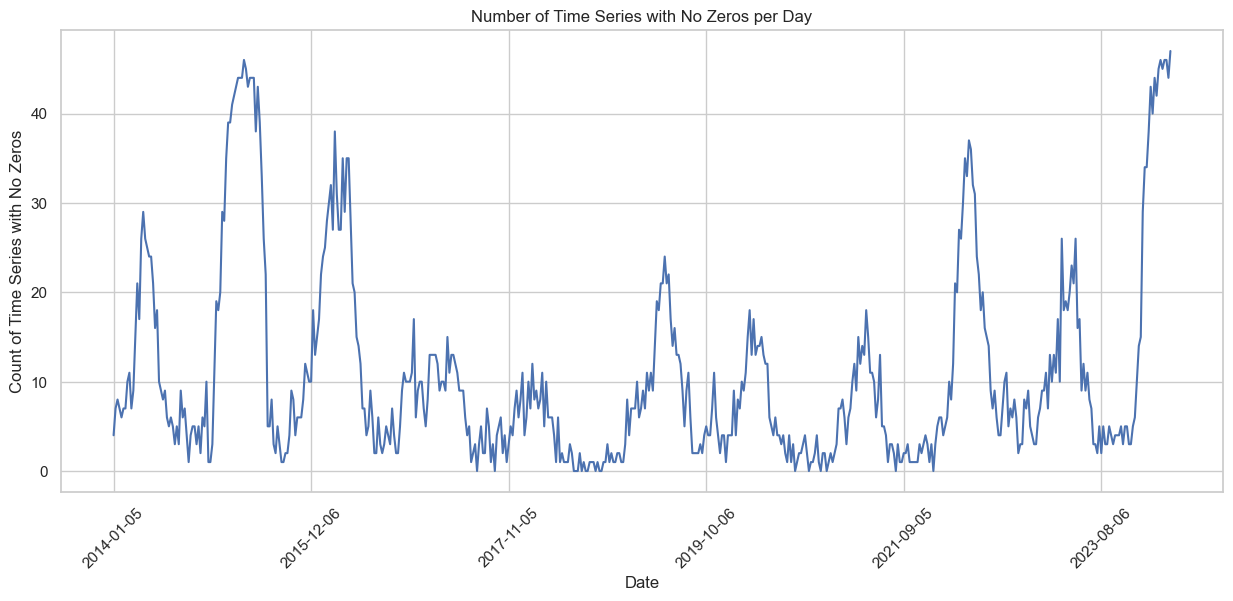

In [8]:
# Step 1: Check, for each day, how many columns have non-zero values.
non_zero_count = (cases_filtered_by_date != 0).sum(axis=1)

plt.figure(figsize=(15, 6))
non_zero_count.plot()
plt.title('Number of Time Series with No Zeros per Day')
plt.xlabel('Date')
plt.ylabel('Count of Time Series with No Zeros')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

#### Plotting Bar Chart (Weekly Cases)

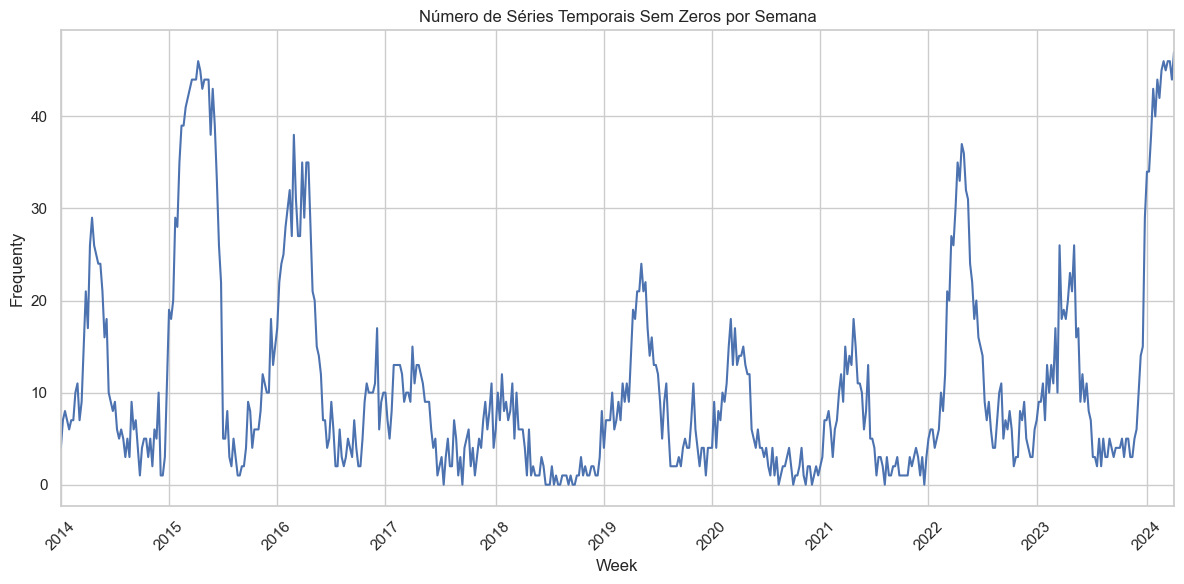

In [9]:
df = cases
df.index = pd.to_datetime(df.index)

# Step 1: Group the Data by Weeks (Resample)
weekly_non_zero_count = (df != 0).resample('W').sum()

# Step 2: Count How Many Columns Have Non-Zero Values for Each Week
weekly_non_zero_count_summary = (weekly_non_zero_count > 0).sum(axis=1)

plt.figure(figsize=(12, 6))
weekly_non_zero_count_summary.plot()
plt.title('Número de Séries Temporais Sem Zeros por Semana')
plt.xlabel('Week')
plt.ylabel('Frequenty')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo X para melhor legibilidade
plt.tight_layout()  # Ajustar o layout
plt.show()

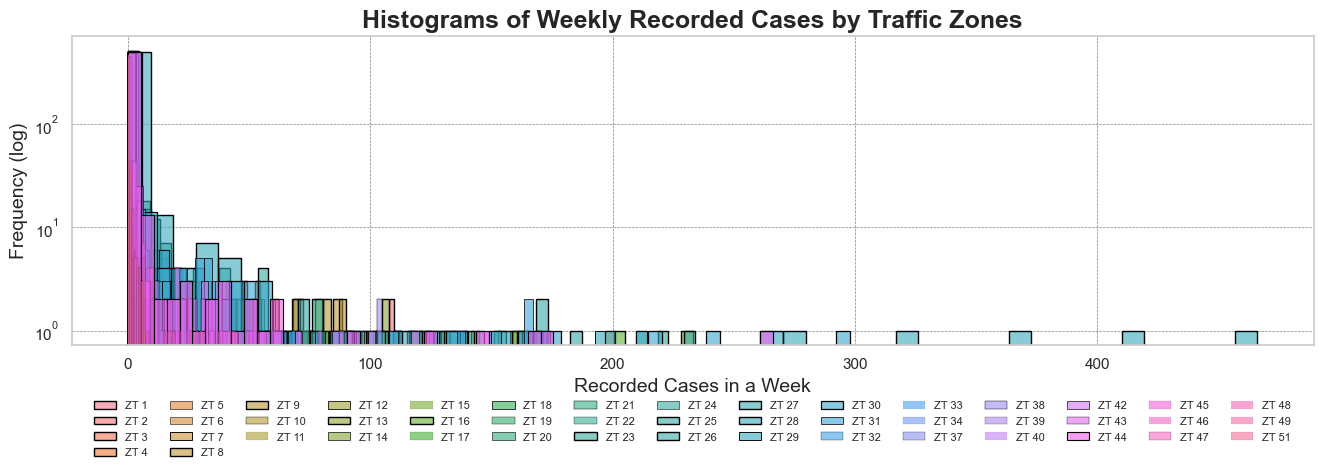

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))  # Aumente a largura do gráfico

num_columns = len(cases.columns)
if num_columns <= 20:
    colors = sns.color_palette("tab20", n_colors=num_columns)  # Usa a paleta tab20
else:
    colors = sns.color_palette("husl", n_colors=num_columns)  # Usa uma paleta que gera mais cores

for i, column in enumerate(cases.columns):
    sns.histplot(cases[column], bins=50, color=colors[i], label=f'ZT {column}', kde=False, alpha=0.6, edgecolor='black')

plt.title('Histograms of Weekly Recorded Cases by Traffic Zones', fontsize=18, weight='bold')
plt.xlabel('Recorded Cases in a Week', fontsize=14)
plt.ylabel('Frequency (log)', fontsize=14)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=15, fontsize=8, frameon=False)  # Ajuste ncol para o número de colunas desejado
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax = plt.gca()
ax.set_yscale('log')

plt.tight_layout()
plt.show()


In [18]:
cases

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,37,38,39,40,42,43,44,45,46,47,48,49,51
2014-01-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-19,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2014-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-10,108.0,125.0,72.0,105.0,23.0,20.0,31.0,172.0,118.0,28.0,0.0,66.0,142.0,40.0,3.0,201.0,6.0,64.0,45.0,40.0,34.0,25.0,162.0,56.0,170.0,135.0,146.0,417.0,200.0,298.0,166.0,69.0,5.0,5.0,53.0,104.0,39.0,5.0,123.0,53.0,174.0,10.0,1.0,44.0,0.0,4.0,14.0
2024-03-17,112.0,115.0,103.0,98.0,35.0,33.0,58.0,201.0,161.0,34.0,0.0,62.0,154.0,68.0,4.0,233.0,14.0,86.0,43.0,67.0,53.0,33.0,142.0,61.0,234.0,166.0,171.0,466.0,214.0,244.0,174.0,58.0,7.0,18.0,62.0,105.0,50.0,6.0,150.0,89.0,266.0,22.0,1.0,37.0,2.0,2.0,14.0
2024-03-24,49.0,52.0,46.0,37.0,12.0,11.0,27.0,124.0,73.0,22.0,0.0,50.0,105.0,37.0,2.0,161.0,6.0,49.0,25.0,41.0,33.0,15.0,100.0,37.0,170.0,124.0,105.0,277.0,169.0,166.0,108.0,57.0,4.0,10.0,60.0,70.0,30.0,7.0,71.0,53.0,148.0,15.0,4.0,26.0,3.0,4.0,6.0
2024-03-31,43.0,26.0,30.0,30.0,9.0,14.0,29.0,88.0,50.0,14.0,0.0,32.0,98.0,37.0,5.0,121.0,4.0,31.0,20.0,23.0,13.0,7.0,80.0,39.0,127.0,93.0,76.0,269.0,154.0,132.0,86.0,53.0,7.0,7.0,55.0,91.0,30.0,0.0,99.0,39.0,123.0,5.0,0.0,29.0,2.0,2.0,5.0


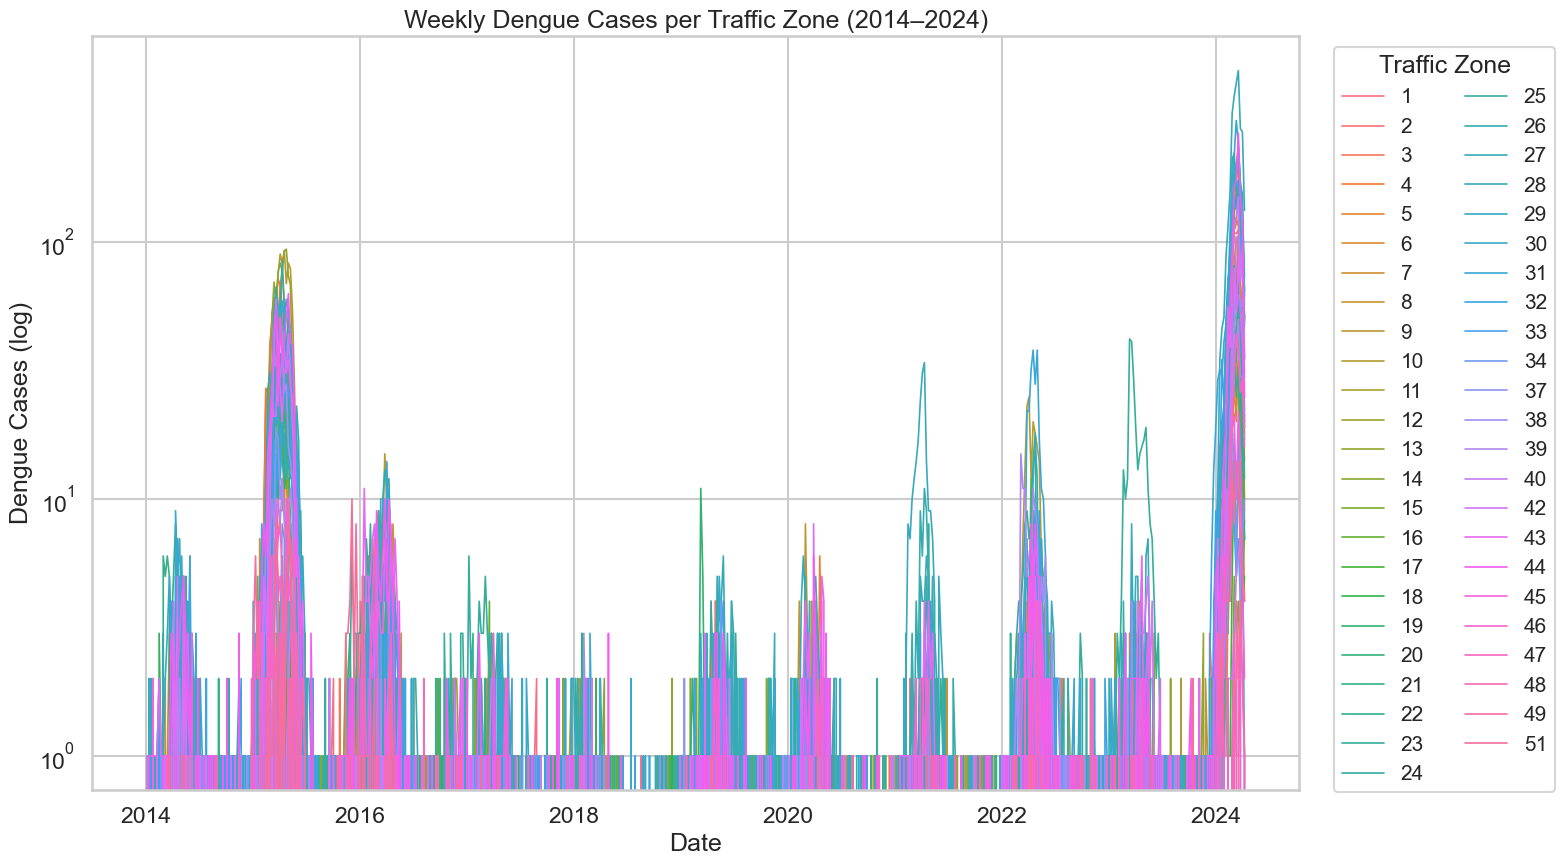

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df: índice com datas (datetime), colunas = ZTs (1 a 47)
df.columns = df.columns.astype(str)  # Garante que os nomes estão como string

# Formato longo
df_long = df.reset_index().melt(id_vars='index', var_name='Traffic Zone', value_name='Dengue Cases')
df_long = df_long.rename(columns={'index': 'Date'})

# Plot
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", palette="tab20", context="talk")

# Cria o gráfico com legenda
plot = sns.lineplot(
    data=df_long,
    x='Date',
    y='Dengue Cases',
    hue='Traffic Zone',
    linewidth=1.2
)

# Escala log no eixo Y
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Dengue Cases (log)')
plt.title('Weekly Dengue Cases per Traffic Zone (2014–2024)', fontsize=18)

# Legenda fora do gráfico
plt.legend(
    title='Traffic Zone',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    ncol=2,
    fontsize='small',
    title_fontsize='medium'
)

# Layout bonito
plt.tight_layout()
plt.savefig("dengue_cases_all_zts_log_with_legend.png", dpi=300, bbox_inches='tight')
plt.show()


#### Calculating Similarity Matrix with Mutual Information

In [12]:
n = cases.shape[1]
matriz_similaridade_inform_mutua = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            matriz_similaridade_inform_mutua[i, j] = 1.0 
        else:
            info_mutua = mutual_info_regression(cases[[cases.columns[i]]], cases[cases.columns[j]],random_state=42)  # Fixando o random_state para consistência)
            matriz_similaridade_inform_mutua[i, j] = info_mutua[0]

matriz_similaridade_df = pd.DataFrame(matriz_similaridade_inform_mutua, index=cases.columns, columns=cases.columns)

print("Similarity Matrix (Mutual Information):")
matriz_similaridade_df

Similarity Matrix (Mutual Information):


,1,2,3,4,5,6,7,8,9,10,...,40,42,43,44,45,46,47,48,49,51
1,1.000000,0.299699,0.245557,0.249601,0.188950,0.206260,0.212496,0.188878,0.226618,0.174067,...,0.084725,0.232498,0.190517,0.160413,0.176958,0.080931,0.136465,0.036587,0.062121,0.129715
2,0.293924,1.000000,0.179543,0.212506,0.155021,0.208909,0.193711,0.203235,0.197413,0.128705,...,0.061413,0.231451,0.200183,0.174742,0.160315,0.061291,0.178788,0.015994,0.046612,0.124304
3,0.235255,0.177711,1.000000,0.241946,0.163849,0.166301,0.195295,0.157274,0.204941,0.137463,...,0.060625,0.158262,0.188696,0.177382,0.119888,0.090016,0.114684,0.035461,0.045842,0.087121
4,0.242368,0.209677,0.241488,1.000000,0.216752,0.200454,0.179156,0.178945,0.216182,0.130736,...,0.088976,0.164102,0.195226,0.177736,0.164746,0.106504,0.143513,0.034090,0.083821,0.117361
5,0.179675,0.151074,0.154723,0.208004,1.000000,0.154987,0.185002,0.148929,0.173474,0.118716,...,0.063326,0.167057,0.169314,0.147887,0.165706,0.073559,0.131268,0.025582,0.027549,0.080946
6,0.207383,0.205123,0.174809,0.203794,0.164406,1.000000,0.205840,0.182976,0.190916,0.107059,...,0.098840,0.188025,0.163755,0.184511,0.124831,0.069117,0.135035,0.057868,0.083569,0.123438
7,0.209019,0.188674,0.200000,0.190982,0.191747,0.208733,1.000000,0.179456,0.184289,0.126284,...,0.082562,0.194280,0.187651,0.178853,0.141779,0.074681,0.137271,0.036193,0.061349,0.091667
8,0.201255,0.216019,0.166980,0.195191,0.158088,0.202190,0.192226,1.000000,0.215150,0.132050,...,0.106265,0.283155,0.241344,0.253602,0.154392,0.073919,0.197417,0.053089,0.066355,0.134655
9,0.230172,0.216310,0.208452,0.217680,0.178510,0.196919,0.197860,0.210411,1.000000,0.181642,...,0.073291,0.218046,0.220551,0.239044,0.133591,0.055295,0.140475,0.020206,0.049842,0.118186
10,0.163604,0.116247,0.135318,0.113410,0.120795,0.105675,0.126388,0.103684,0.171966,1.000000,...,0.045368,0.124181,0.135339,0.060840,0.178603,0.058281,0.067349,0.022570,0.049798,0.050625


In [13]:
matriz_similaridade_df.to_csv('data/weeklycases_mutualinformation.csv')

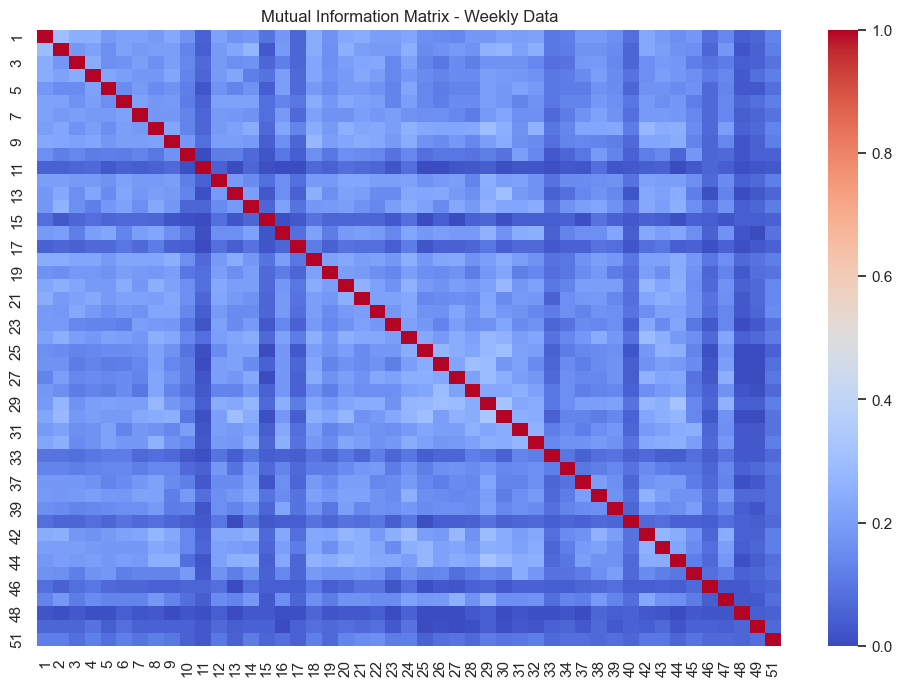

In [14]:
pd.set_option('display.max_columns', None)
informacao_mutua_semanal = matriz_similaridade_df.round(2)
informacao_mutua_semanal

plt.figure(figsize=(12, 8))
sns.heatmap(informacao_mutua_semanal, cmap='coolwarm', cbar=True)
plt.title('Mutual Information Matrix - Weekly Data')
plt.show()

#### Histogram of Mutual Information Values Calculated Between Pairs of Time Series from ZTs

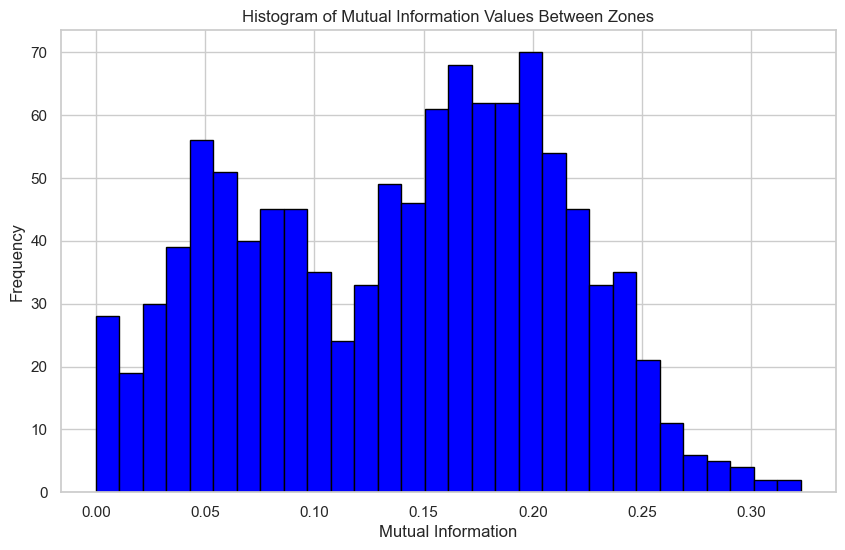

In [16]:
# Step 1: Extract the Values from the Upper Part of the Similarity Matrix
valores_inform_mutua = matriz_similaridade_df.values
valores_superior = valores_inform_mutua[np.triu_indices(n, k=1)]  # k=1 para ignorar a diagonal

# Step 2: Plot the Histogram of Mutual Information Values
plt.figure(figsize=(10, 6))
plt.hist(valores_superior, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Mutual Information Values Between Zones')
plt.xlabel('Mutual Information')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()